# Reza Arabpour 

## Testing Different Clustring Algorithmes on DataMining Lab Datasets

### Data Preprocessing

    First off, Import required libraries as below.

In [1]:
#Loading General Tools and Libraries
!pip install fuzzy-c-means 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Data Processing

    Then uploading the datasets into the colab environment one by one.

In [2]:
#Loading Dataset
from google.colab import files
uploaded = files.upload()
df1 = pd.read_csv('first_clustering_dataset.csv', names=['col1', 'col2'])
df2 = pd.read_csv('second_clustering_dataset.csv', names=['col1', 'col2'])
df3 = pd.read_csv('third_clustering_dataset.csv', names=['col1', 'col2'])

Saving third_clustering_dataset.csv to third_clustering_dataset.csv
Saving second_clustering_dataset.csv to second_clustering_dataset.csv
Saving first_clustering_dataset.csv to first_clustering_dataset (1).csv


### Data Preprocess

    This is a very important step, in which we scale the data to preventing further problems such as bias and problems in effect of a feature in models' learning.

In [3]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df1 = sc.fit_transform(df1)
df2 = sc.fit_transform(df2)
df3 = sc.fit_transform(df3)

### Ploting Data

    So, to get familiar with the datasets, ploting them could help alot. In the next following cells we plot each dataset as scatter-plot and do some guessing.

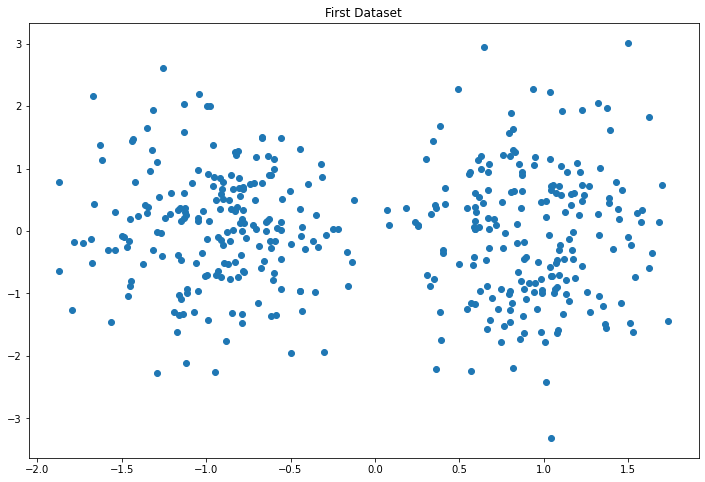

In [4]:
plt.figure(figsize=(12,8))
plt.scatter(df1[:, 0], df1[:, 1])
plt.title(label='First Dataset')
plt.show()

    It is more likely that the dataset shown above, consisted of two big clusters.(one in the right and one in the left.)

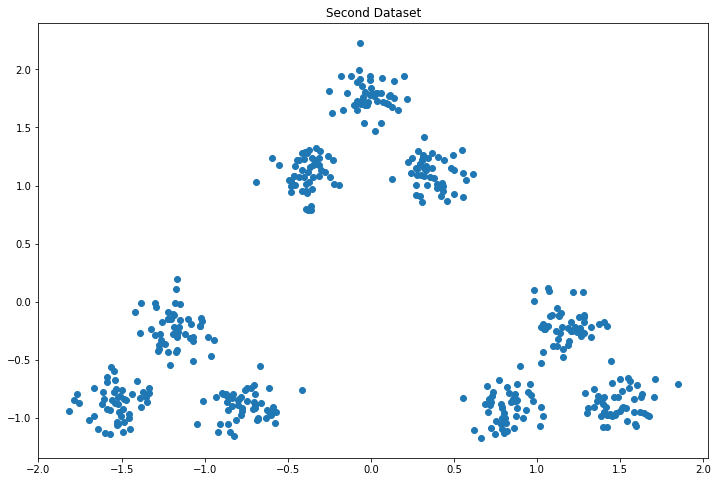

In [5]:
plt.figure(figsize=(12,8))
plt.scatter(df2[:, 0], df2[:, 1])
plt.title(label='Second Dataset')
plt.show()

    For this dataset, three or nine clusters looks fine, because the plot obviously made out of three separated clusters where each of them has three sub-clusters itself.

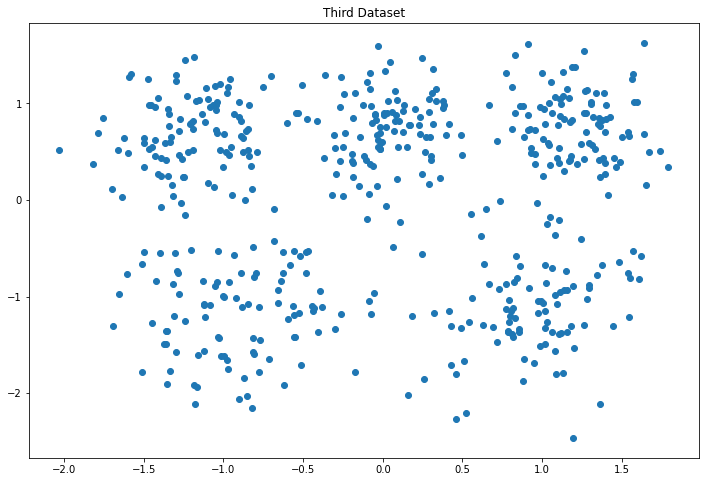

In [6]:
plt.figure(figsize=(12,8))
plt.scatter(df3[:, 0], df3[:, 1])
plt.title(label='Third Dataset')
plt.show()

    And finally for this one, maybe fine clusters would be optimal.

### K-Means Clustering

    So now, lets run our first algorithm, the K-means, on each dataset.

#### First Dataset With K = 4

In [7]:
#Model Making and Training
from sklearn.cluster import KMeans
kmeans1 = KMeans(n_clusters=4, max_iter = 1000, random_state = 42)
kmeans1.fit(df1)
y1 = kmeans1.labels_

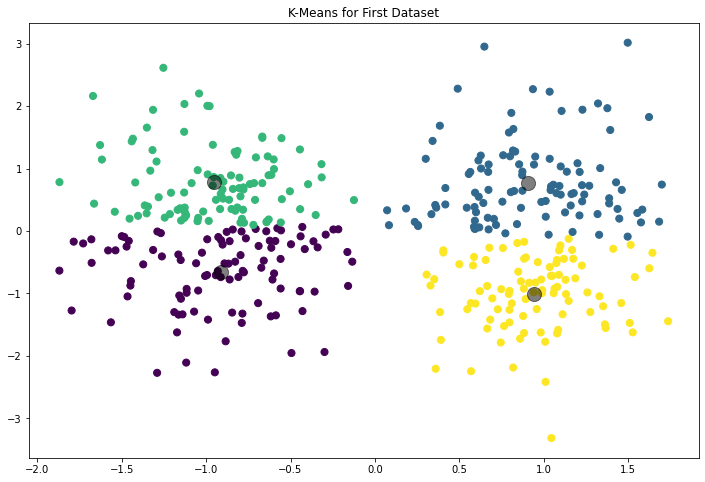

In [8]:
#Plotting the resualt
plt.figure(figsize=(12,8))
plt.scatter(df1[:, 0], df1[:, 1], c=y1, s=50, cmap='viridis')
centers1 = kmeans1.cluster_centers_
plt.scatter(centers1[:, 0], centers1[:, 1], c='black', s=200, alpha=0.5)
plt.title('K-Means for First Dataset')
plt.show()

In [9]:
#printing the SSE error for further comparison
print("SSE Error = ", kmeans1.inertia_)

SSE Error =  193.20860240983205


#### Second Dataset With K = 3

In [10]:
#Model Making and Training
from sklearn.cluster import KMeans
kmeans2 = KMeans(n_clusters=3, max_iter = 1000, random_state = 42)
kmeans2.fit(df2)
y2 = kmeans2.predict(df2)

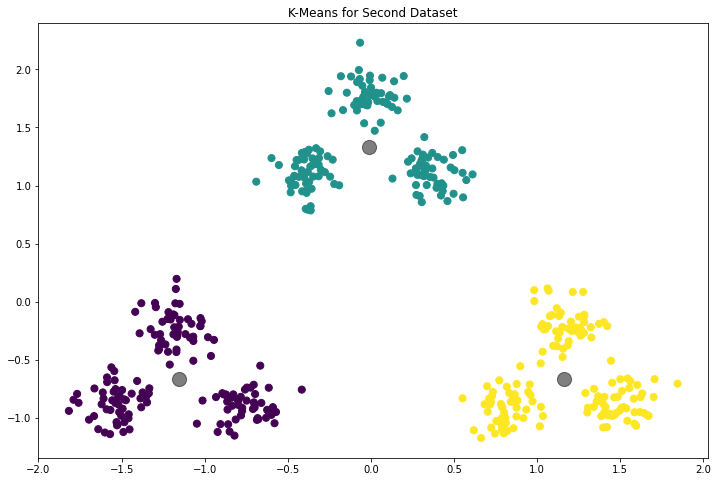

In [11]:
#Plotting the resualt
plt.figure(figsize=(12,8))
plt.scatter(df2[:, 0], df2[:, 1], c=y2, s=50, cmap='viridis')
centers2 = kmeans2.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1], c='black', s=200, alpha=0.5)
plt.title('K-Means for Second Dataset')
plt.show()

In [12]:
#printing the SSE error for further comparison
print("SSE Error = ", kmeans2.inertia_)

SSE Error =  99.01689818029729


#### Third Dataset With K = 5

In [13]:
#Model Making and Training
from sklearn.cluster import KMeans
kmeans3 = KMeans(n_clusters=5, max_iter = 1000, random_state = 42)
kmeans3.fit(df3)
y3 = kmeans3.labels_

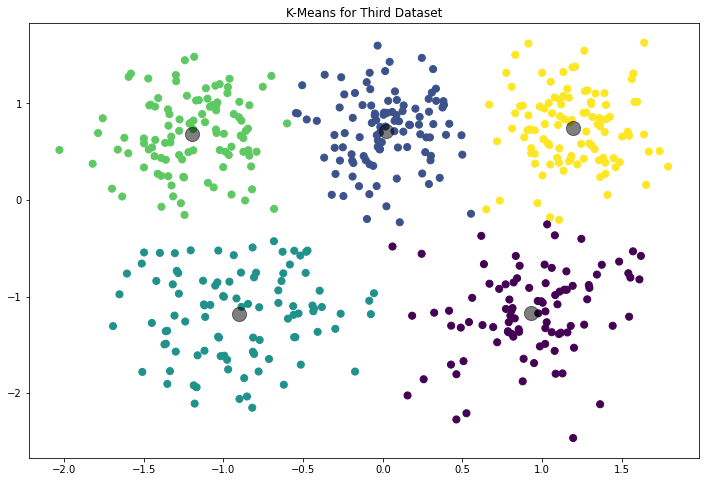

In [14]:
#Plotting the resualt
plt.figure(figsize=(12,8))
plt.scatter(df3[:, 0], df3[:, 1], c=y3, s=50, cmap='viridis')
centers3 = kmeans3.cluster_centers_
plt.scatter(centers3[:, 0], centers3[:, 1], c='black', s=200, alpha=0.5)
plt.title('K-Means for Third Dataset')
plt.show()

In [15]:
#printing the SSE error for further comparison
print("SSE Error = ", kmeans3.inertia_)

SSE Error =  127.4119395729554


### Elbow Point Ploting

#### Elbow Curve for First Dataset

    Then, for each dataset, we run the clustring 200 time for each number of clusters between 1 to 15, to find out the elbow point and measure our previous choise in number of clusters.


In [16]:
number_of_clusers = range(1, 16)
number_of_iterations = range(200)
kmeansGrid1 = [[KMeans(n_clusters=i, max_iter = 300).fit(df1) for j in number_of_iterations] for i in number_of_clusers]
bestscore1 = [max([kmeansGrid1[i][j].inertia_ for j in number_of_iterations]) for i in range(15)]

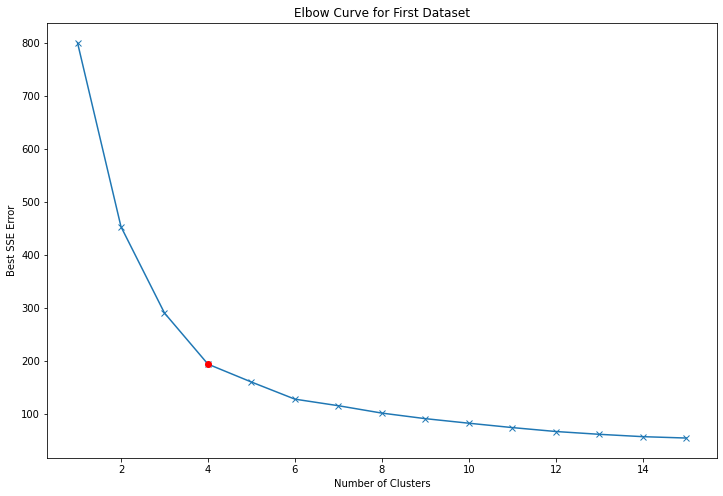

In [17]:
plt.figure(figsize=(12,8))
plt.plot(number_of_clusers, bestscore1, '-x')
plt.plot(number_of_clusers[3], bestscore1[3], '-or')
plt.title('Elbow Curve for First Dataset')
plt.xlabel('Number of Clusters')
plt.ylabel('Best SSE Error')
plt.show()

    It seems like our choise was not the best option and four or six would perform better than two.



#### Elbow Curve for Second Dataset

In [18]:
number_of_clusers = range(1, 16)
number_of_iterations = range(200)
kmeansGrid2 = [[KMeans(n_clusters=i, max_iter = 300).fit(df2) for j in number_of_iterations] for i in number_of_clusers]
bestscore2 = [max([kmeansGrid2[i][j].inertia_ for j in number_of_iterations]) for i in range(15)]

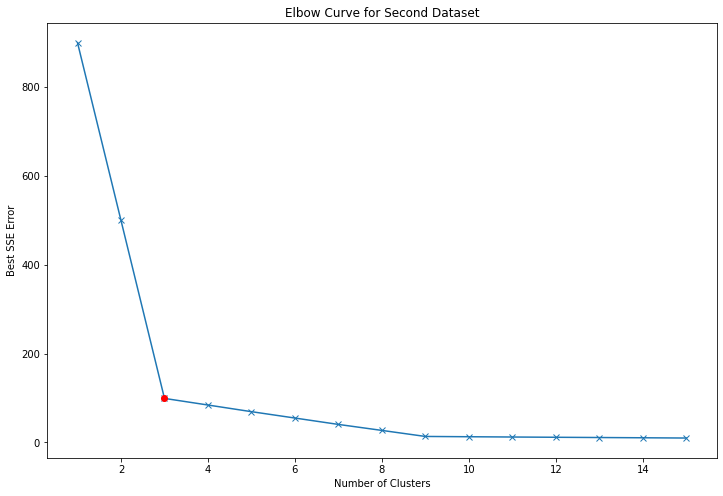

In [19]:
plt.figure(figsize=(12,8))
plt.plot(number_of_clusers, bestscore2, '-x')
plt.plot(number_of_clusers[2], bestscore2[2], '-or')
plt.title('Elbow Curve for Second Dataset')
plt.xlabel('Number of Clusters')
plt.ylabel('Best SSE Error')
plt.show()

    As we expected, the point three and nine are the proper options.


#### Elbow Curve for Third Dataset

In [20]:
number_of_clusers = range(1, 16)
number_of_iterations = range(200)
kmeansGrid3 = [[KMeans(n_clusters=i, max_iter = 300).fit(df3) for j in number_of_iterations] for i in number_of_clusers]
bestscore3 = [max([kmeansGrid3[i][j].inertia_ for j in number_of_iterations]) for i in range(15)]

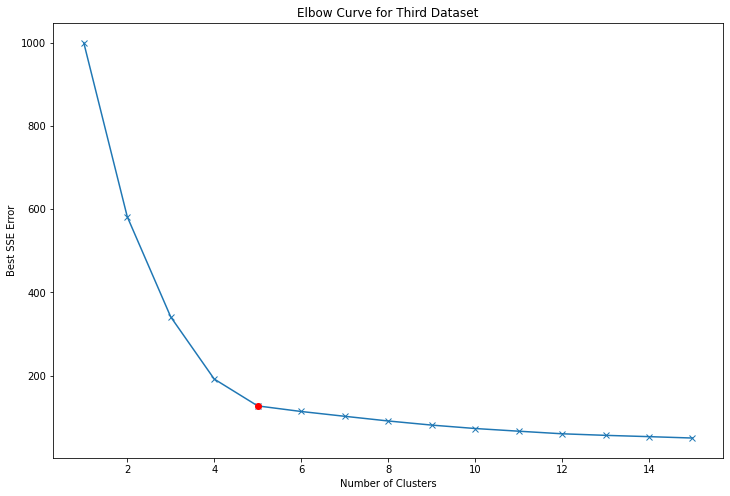

In [21]:
plt.figure(figsize=(12,8))
plt.plot(number_of_clusers, bestscore3, '-x')
plt.plot(number_of_clusers[4], bestscore3[4], '-or')
plt.title('Elbow Curve for Third Dataset')
plt.xlabel('Number of Clusters')
plt.ylabel('Best SSE Error')
plt.show()

    For this one, it is obvious that five was a good choice.

### Fuzzy C-Means

#### Fuzzy C-Means for First Dataset

In [22]:
from fcmeans import FCM

fuzzyCMeans1 = FCM(n_clusters=4)
fuzzyCMeans1.fit(df1)

fuzzy_c1 = fuzzyCMeans1.centers
fuzzy_y1 = fuzzyCMeans1.predict(df1)

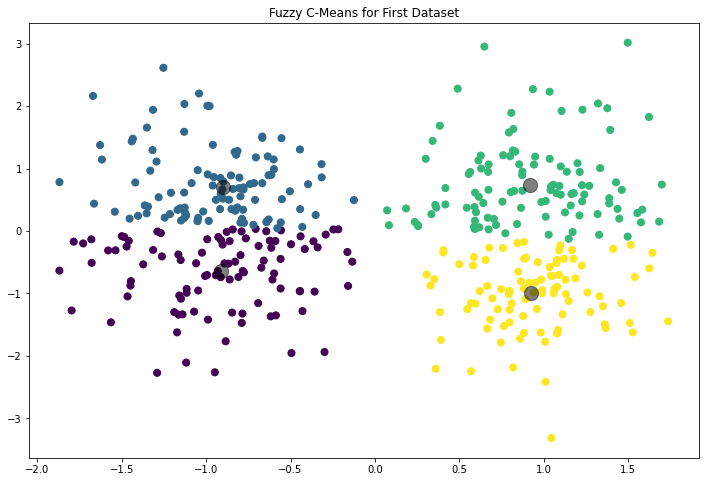

In [23]:
plt.figure(figsize=(12,8))
plt.scatter(df1[:, 0], df1[:, 1], c=fuzzy_y1, s=50, cmap='viridis')
plt.scatter(fuzzy_c1[:, 0], fuzzy_c1[:, 1], c='black', s=200, alpha=0.5)
plt.title('Fuzzy C-Means for First Dataset')
plt.show()

In [24]:
#printing the SSE error for further comparison
SSE_Fuzzy_1 = sum(sum([(df1[i,:] - fuzzy_c1[fuzzy_y1[i]])**2 for i in range(len(df1))]))
print("SSE Error = ", SSE_Fuzzy_1)

SSE Error =  194.19778227512552


#### Fuzzy C-Means for Second Dataset

In [25]:
from fcmeans import FCM

fuzzyCMeans2 = FCM(n_clusters=3)
fuzzyCMeans2.fit(df2)

fuzzy_c2 = fuzzyCMeans2.centers
fuzzy_y2 = fuzzyCMeans2.predict(df2)

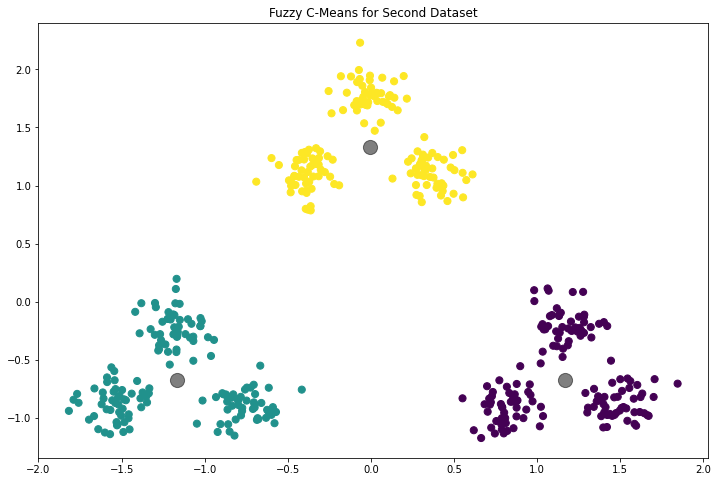

In [26]:
plt.figure(figsize=(12,8))
plt.scatter(df2[:, 0], df2[:, 1], c=fuzzy_y2, s=50, cmap='viridis')
plt.scatter(fuzzy_c2[:, 0], fuzzy_c2[:, 1], c='black', s=200, alpha=0.5)
plt.title('Fuzzy C-Means for Second Dataset')
plt.show()

In [27]:
#printing the SSE error for further comparison
SSE_Fuzzy_2 = sum(sum([(df2[i,:] - fuzzy_c2[fuzzy_y2[i]])**2 for i in range(len(df2))]))
print("SSE Error = ", SSE_Fuzzy_2)

SSE Error =  99.05379132348075


#### Fuzzy C-Means for Third Dataset

In [28]:
from fcmeans import FCM

fuzzyCMeans3 = FCM(n_clusters=5)
fuzzyCMeans3.fit(df3)

fuzzy_c3 = fuzzyCMeans3.centers
fuzzy_y3 = fuzzyCMeans3.predict(df3)

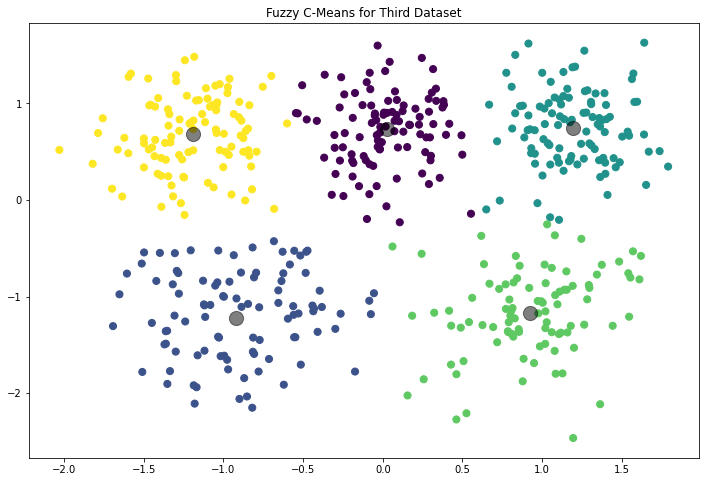

In [29]:
plt.figure(figsize=(12,8))
plt.scatter(df3[:, 0], df3[:, 1], c=fuzzy_y3, s=50, cmap='viridis')
plt.scatter(fuzzy_c3[:, 0], fuzzy_c3[:, 1], c='black', s=200, alpha=0.5)
plt.title('Fuzzy C-Means for Third Dataset')
plt.show()

In [30]:
#printing the SSE error for further comparison
SSE_Fuzzy_3 = sum(sum([(df3[i,:] - fuzzy_c3[fuzzy_y3[i]])**2 for i in range(len(df3))]))
print("SSE Error = ", SSE_Fuzzy_3)

SSE Error =  127.65978733052438


### DBScan Clustering

    In this part, we try DBscan on our datasets. Since, in DBscan we do not specify the clusters count, by some try and error we reach to this number which are may not be the optimal but good enough.

#### DBScan for the First Dataset

In [31]:
from sklearn.cluster import DBSCAN
DBS1 = DBSCAN(eps=0.2, min_samples=7).fit(df1)
DBS1_y = DBS1.labels_
DBS1_y += 1
print("number of clusets =",len(set(DBS1_y)))
DBScan_c1 = [[],[],[],[],[],[],[],[],[],[]]
for i in range(len(set(DBS1_y))):
  for j in  range(len(df1)):
    if DBS1_y[j] == i:
      DBScan_c1[i].append(df1[j])
DBScan_c1 = [sum(DBScan_c1[i])/len(DBScan_c1[i]) for i in range(len(DBScan_c1))]
DBScan_c1 = np.array(DBScan_c1)

number of clusets = 10


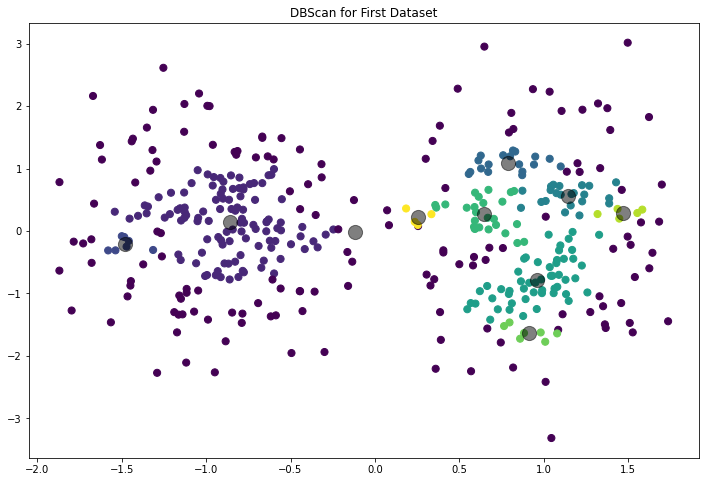

In [32]:
plt.figure(figsize=(12,8))
plt.scatter(df1[:, 0], df1[:, 1], c=DBS1_y, s=50, cmap='viridis')
plt.scatter(DBScan_c1[:, 0], DBScan_c1[:, 1], c='black', s=200, alpha=0.5)
plt.title('DBScan for First Dataset')
plt.show()

In [33]:
#printing the SSE error for further comparison
SSE_DBScan_1 = sum(sum([(df1[i,:] - DBScan_c1[DBS1_y[i]])**2 for i in range(len(df1))]))
print("SSE Error = ", SSE_DBScan_1)

SSE Error =  503.44452639013593


#### DBScan for the Second Dataset

In [34]:
from sklearn.cluster import DBSCAN

DBS2 = DBSCAN(eps=0.2, min_samples=9).fit(df2)
DBS2_y = DBS2.labels_
print("number of clusets =",len(set(DBS2_y)))
DBS2_y += 1
DBScan_c2 = [[],[],[],[],[],[],[],[],[],[]]
for i in range(len(set(DBS2_y))):
  for j in  range(len(df2)):
    if DBS2_y[j] == i:
      DBScan_c2[i].append(df2[j])
DBScan_c2 = [sum(DBScan_c2[i])/len(DBScan_c2[i]) for i in range(len(DBScan_c2))]
DBScan_c2 = np.array(DBScan_c2)

number of clusets = 10


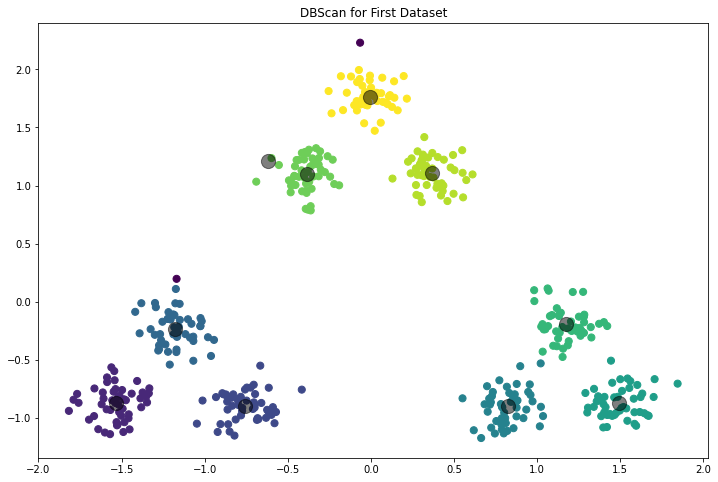

In [35]:
plt.figure(figsize=(12,8))
plt.scatter(df2[:, 0], df2[:, 1], c=DBS2_y, s=50, cmap='viridis')
plt.scatter(DBScan_c2[:, 0], DBScan_c2[:, 1], c='black', s=200, alpha=0.5)
plt.title('DBScan for First Dataset')
plt.show()

In [36]:
#printing the SSE error for further comparison
SSE_DBScan_2 = sum(sum([(df2[i,:] - DBScan_c2[DBS2_y[i]])**2 for i in range(len(df2))]))
print("SSE Error = ", SSE_DBScan_2)

SSE Error =  15.673888437759278


#### DBScan for the Third Dataset

In [37]:
from sklearn.cluster import DBSCAN

DBS3 = DBSCAN(eps=0.25, min_samples=10).fit(df3)
DBS3_y = DBS3.labels_
print("number of clusets =",len(set(DBS3_y)))
DBS3_y += 1
DBScan_c3 = [[],[],[],[],[],[],[]]
for i in range(len(set(DBS3_y))):
  for j in  range(len(df3)):
    if DBS3_y[j] == i:
      DBScan_c3[i].append(df3[j])
DBScan_c3 = [sum(DBScan_c3[i])/len(DBScan_c3[i]) for i in range(len(DBScan_c3))]
DBScan_c3 = np.array(DBScan_c3)

number of clusets = 7


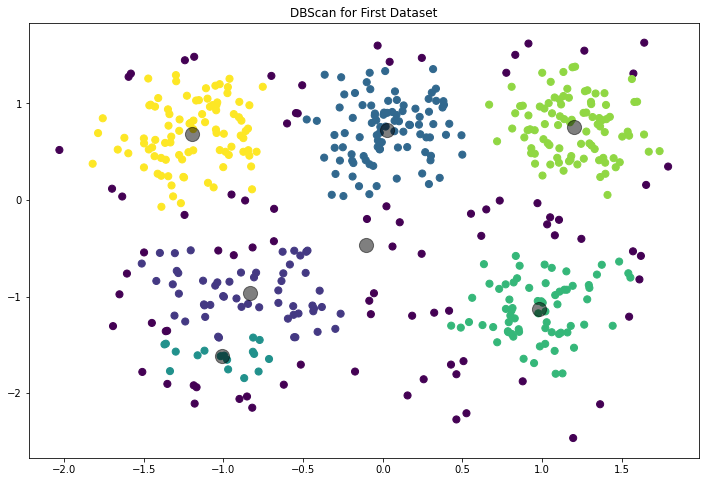

In [38]:
plt.figure(figsize=(12,8))
plt.scatter(df3[:, 0], df3[:, 1], c=DBS3_y, s=50, cmap='viridis')
plt.scatter(DBScan_c3[:, 0], DBScan_c3[:, 1], c='black', s=200, alpha=0.5)
plt.title('DBScan for First Dataset')
plt.show()

In [39]:
#printing the SSE error for further comparison
SSE_DBScan_3 = sum(sum([(df3[i,:] - DBScan_c3[DBS3_y[i]])**2 for i in range(len(df3))]))
print("SSE Error = ", SSE_DBScan_3)

SSE Error =  273.4110050308556


### Conclusion

    What we saw from different algorithms, the density based models are good when the data are inherently separated localy; so the algoritgm worked quite well in second dataset but not that well in the other two (based on the SSE erorr measure.)

    The K-means and the Fuzzy C-means both worked well, and in compare to each other, the K-means was a little bit better to be honest.

    So to sum up, Models by their total performance:
        - K-means
        - Fuzzy C-means
        - Density Based (DBScan)
        
    Models by their usage:
        - for normal data : K-means
        - complex and not seprated data : Fuzzy C-means
        - spacial complex but well-separated : Density Based


#### Hypothesis check

    At the end, to check the assumption above, since the algorithms are random intrinsic, we run 200 times each of the K-means and Fuzzy C-means to make sure that the hypothesis is right and was not just an odd run.

In [40]:
from fcmeans import FCM
from sklearn.cluster import KMeans

FuzzyErrors1 = []
FuzzyErrors2 = []
FuzzyErrors3 = []
KmeansErrors1 = []
KmeansErrors2 = []
KmeansErrors3 = []

numberOfIterations = 200

for i in range(numberOfIterations):
  fuzzyCMeans1 = FCM(n_clusters=4)
  fuzzyCMeans1.fit(df1)
  fuzzy_c1 = fuzzyCMeans1.centers
  fuzzy_y1 = fuzzyCMeans1.predict(df1)
  SSE_Fuzzy_1 = sum(sum([(df1[j,:] - fuzzy_c1[fuzzy_y1[j]])**2 for j in range(len(df1))]))
  FuzzyErrors1.append(SSE_Fuzzy_1)

  fuzzyCMeans2 = FCM(n_clusters=3)
  fuzzyCMeans2.fit(df2)
  fuzzy_c2 = fuzzyCMeans2.centers
  fuzzy_y2 = fuzzyCMeans2.predict(df2)
  SSE_Fuzzy_2 = sum(sum([(df2[j,:] - fuzzy_c2[fuzzy_y2[j]])**2 for j in range(len(df2))]))
  FuzzyErrors2.append(SSE_Fuzzy_2)

  fuzzyCMeans3 = FCM(n_clusters=5)
  fuzzyCMeans3.fit(df3)
  fuzzy_c3 = fuzzyCMeans3.centers
  fuzzy_y3 = fuzzyCMeans3.predict(df3)
  SSE_Fuzzy_3 = sum(sum([(df3[j,:] - fuzzy_c3[fuzzy_y3[j]])**2 for j in range(len(df3))]))
  FuzzyErrors3.append(SSE_Fuzzy_3)

for i in range (numberOfIterations):
  kmeans1 = KMeans(n_clusters=4, max_iter = 300)
  kmeans1.fit(df1)
  KmeansErrors1.append(kmeans1.inertia_)

  kmeans2 = KMeans(n_clusters=3, max_iter = 300)
  kmeans2.fit(df2)
  KmeansErrors2.append(kmeans2.inertia_)

  kmeans3 = KMeans(n_clusters=5, max_iter = 300)
  kmeans3.fit(df3)
  KmeansErrors3.append(kmeans3.inertia_)

diff1 = sum(FuzzyErrors1) - sum(KmeansErrors1)
diff2 = sum(FuzzyErrors2) - sum(KmeansErrors2)
diff3 = sum(FuzzyErrors3) - sum(KmeansErrors3)

if  diff1 >= 0:
  print("For the first dataset the K-means advantage proved with ", diff1, "in total less error ! (200 times run)")
if  diff2 >= 0:
  print("For the second dataset the K-means advantage proved with ", diff2, "in total less error ! (200 times run)")
if  diff3 >= 0:
  print("For the third dataset the K-means advantage proved with ", diff3, "in total less error ! (200 times run)")

For the first dataset the K-means advantage proved with  401.2996676847106 in total less error ! (200 times run)
For the second dataset the K-means advantage proved with  7.378639804173872 in total less error ! (200 times run)
For the third dataset the K-means advantage proved with  49.5688443771578 in total less error ! (200 times run)
